In [1]:
!pip install --upgrade torchvision --pre --extra-index-url https://download.pytorch.org/whl/nightly/cu124

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 64.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.0 MB/s eta 0:00:000:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 14.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 26.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirpath ,dirnames, filenames in os.walk('/kaggle/input'):
#     print(f'There are {len(dirnames)} dir and {len(filenames)} files in {dirpath}')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

There are 1 dir and 0 files in /kaggle/input
There are 1 dir and 0 files in /kaggle/input/coco-2017-dataset
There are 4 dir and 0 files in /kaggle/input/coco-2017-dataset/coco2017
There are 0 dir and 5000 files in /kaggle/input/coco-2017-dataset/coco2017/val2017
There are 0 dir and 6 files in /kaggle/input/coco-2017-dataset/coco2017/annotations
There are 0 dir and 40670 files in /kaggle/input/coco-2017-dataset/coco2017/test2017
There are 0 dir and 118287 files in /kaggle/input/coco-2017-dataset/coco2017/train2017


In [3]:
import os
for *_, filenames in os.walk('/kaggle/input/coco-2017-dataset/coco2017/annotations'):
    for filename in filenames:
        print(filename)

person_keypoints_train2017.json
instances_val2017.json
instances_train2017.json
person_keypoints_val2017.json
captions_train2017.json
captions_val2017.json


In [4]:
import json

# Path to annotation file
ann_file = "/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json"

# Load JSON
with open(ann_file, 'r') as f:
    coco_data = json.load(f)

In [5]:
coco_data.keys()
# Output:
# dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
coco_data['categories'], len(coco_data['categories'])

([{'supercategory': 'person', 'id': 1, 'name': 'person'},
  {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
  {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
  {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
  {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
  {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
  {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
  {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
  {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
  {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
  {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
  {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
  {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
  {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
  {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
  {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
  {'supercategory': 'animal', 'id': 18

In [7]:
# Build a mapping from original COCO ids -> 0..79
coco_ids = [cat['id'] for cat in coco_data['categories']]
coco_id_to_idx = {cat_id: i+1 for i, cat_id in enumerate(coco_ids)}

coco_id_to_idx

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 27: 25,
 28: 26,
 31: 27,
 32: 28,
 33: 29,
 34: 30,
 35: 31,
 36: 32,
 37: 33,
 38: 34,
 39: 35,
 40: 36,
 41: 37,
 42: 38,
 43: 39,
 44: 40,
 46: 41,
 47: 42,
 48: 43,
 49: 44,
 50: 45,
 51: 46,
 52: 47,
 53: 48,
 54: 49,
 55: 50,
 56: 51,
 57: 52,
 58: 53,
 59: 54,
 60: 55,
 61: 56,
 62: 57,
 63: 58,
 64: 59,
 65: 60,
 67: 61,
 70: 62,
 72: 63,
 73: 64,
 74: 65,
 75: 66,
 76: 67,
 77: 68,
 78: 69,
 79: 70,
 80: 71,
 81: 72,
 82: 73,
 84: 74,
 85: 75,
 86: 76,
 87: 77,
 88: 78,
 89: 79,
 90: 80}

In [8]:

coco_data['images'][:1]

[{'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895}]

In [9]:
coco_data['annotations'][:1]

[{'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]],
  'area': 2765.1486500000005,
  'iscrowd': 0,
  'image_id': 558840,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156}]

In [10]:
lst_cat = [ann['category_id'] for ann in coco_data['annotations'] if ann['category_id'] > 80 ]
len(lst_cat)

54335

In [11]:
from collections import defaultdict

# Step 1: Group all categories per image
img_to_categories = defaultdict(set)  # use set to keep unique categories

for ann in coco_data["annotations"]:
    img_to_categories[ann["image_id"]].add(ann["category_id"])

# Step 2: Find images with more than 1 category
multi_cat_imgs = [img_id for img_id, cats in img_to_categories.items() if len(cats) > 1]

print(f"Found {len(multi_cat_imgs)} images with multiple categories.")
print(multi_cat_imgs[:4])

id_to_filename = {img["id"]: img["file_name"] for img in coco_data["images"]}

for img_id in multi_cat_imgs[:5]:  # just show first 5
    print(f"Image: {id_to_filename[img_id]} | Categories: {img_to_categories[img_id]}")

Found 93080 images with multiple categories.
[558840, 200365, 495357, 116061]
Image: 000000558840.jpg | Categories: {1, 67, 44, 47, 50, 58}
Image: 000000200365.jpg | Categories: {2, 3, 67, 47, 58}
Image: 000000495357.jpg | Categories: {1, 18, 4, 31}
Image: 000000116061.jpg | Categories: {1, 3, 4, 6, 44, 18, 31}
Image: 000000016164.jpg | Categories: {18, 70}


In [12]:
a = [img for img in coco_data['images'] if img['id'] == 558840]
a

[{'license': 1,
  'file_name': '000000558840.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000558840.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-15 06:55:40',
  'flickr_url': 'http://farm5.staticflickr.com/4045/4488509035_29a34e4f32_z.jpg',
  'id': 558840}]

In [13]:
import requests

with open('helper.py' , 'wb') as f:
  req = requests.get('https://raw.githubusercontent.com/pytorch/vision/refs/heads/main/gallery/transforms/helpers.py')
  f.write(req.content)

from helper import plot

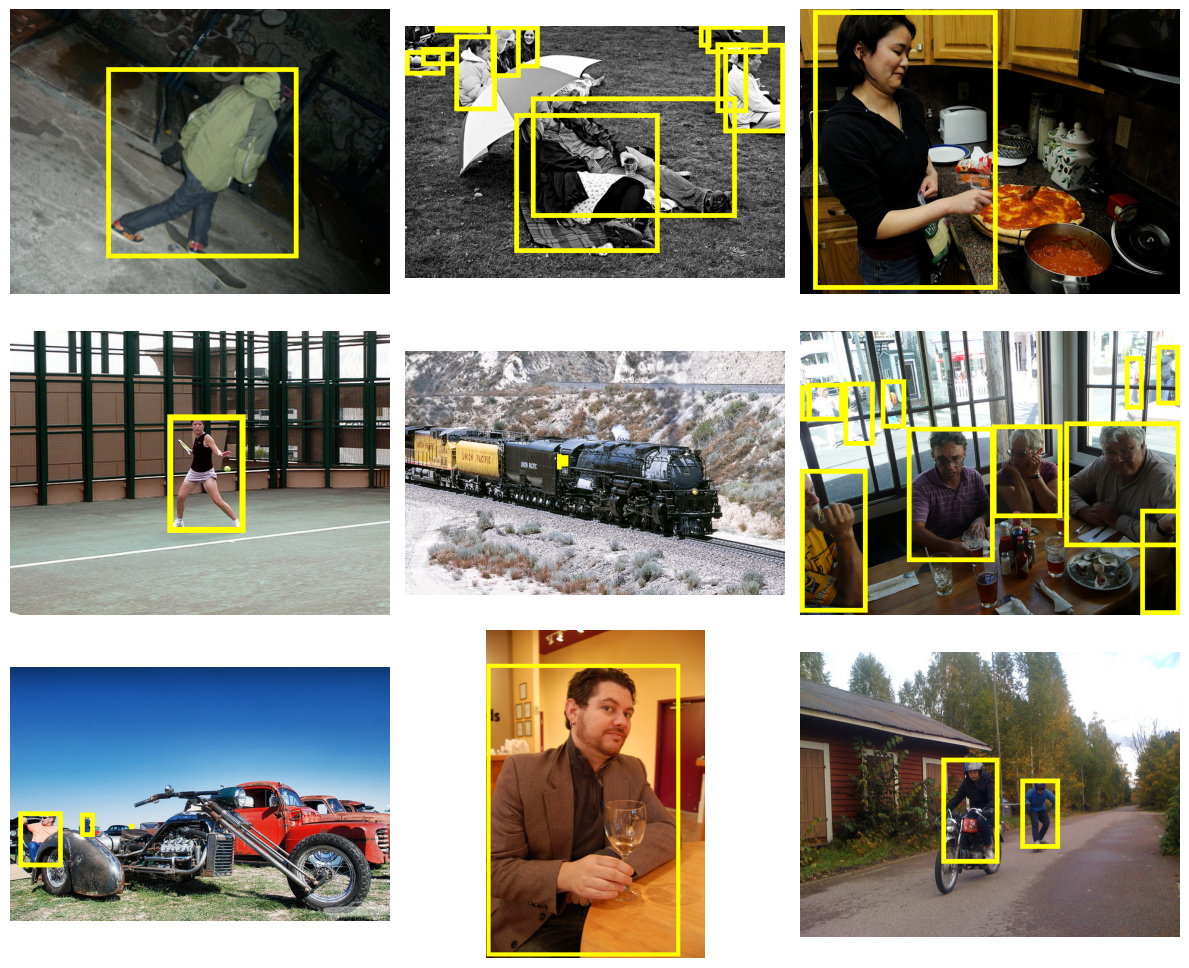

In [14]:
from PIL import Image
from torchvision.transforms.v2 import ToTensor
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from torchvision import tv_tensors
import torch
import random
import os
import math
import matplotlib.pyplot as plt

from collections import defaultdict

root_path = "/kaggle/input/coco-2017-dataset/coco2017/train2017/"

def get_img_box_tuple_list(img_filenames_list : list[str] , bbox_list : list[float] ) -> tuple[torch.Tensor , torch.Tensor]:
    
    #change all img to tensor
    img_box_tuple = []

    for img_name , bboxes in zip(img_filenames_list , bbox_list):
        imgPath = os.path.join(root_path , img_name)
        img = Image.open(imgPath)
        img_tensor = tv_tensors.Image(img)

        bbox_xywh = torch.tensor(bboxes, dtype=torch.float32)

        bbox_xyxy = box_convert(bbox_xywh , in_fmt = 'xywh' , out_fmt = 'xyxy')

        box = tv_tensors.BoundingBoxes(
            data = bbox_xyxy,
            format = 'XYXY',
            canvas_size = img_tensor.shape[-2:]
        )
        
        img_box_tuple.append((img_tensor, box))

    
    return img_box_tuple
        
    

def plot_img_with_box(catagrory_name : str, n : int = 9) -> None:
    category_list = coco_data['categories']
    #get the id  and super catagory from 'categories'
    category_id = next(cat['id'] for cat in category_list if cat['name'] == catagrory_name)

    annotions_list = coco_data['annotations']

    imgToBoxes  = defaultdict(list)

    for ann in annotions_list:
        if ann['category_id'] == category_id:
            imgToBoxes[ann['image_id']].append(ann['bbox'])
    
    
    # random.seed(50)
    img_ids = random.sample(list(imgToBoxes.keys()) , n)
    
    #get all img file name correspoind img id
    img_files_list = coco_data['images']
    
    img_id_to_filename = {img['id'] : img['file_name'] for img in img_files_list}
    
    
    bbox_list = [imgToBoxes[id] for id in img_ids]

    img_filenames_list = [img_id_to_filename[id] for id in img_ids ]

    
    

    imgsAndboxes = get_img_box_tuple_list(img_filenames_list , bbox_list)

    l = len(imgsAndboxes)
    col = 3
    row = math.ceil(l / col)
    
    plt.figure(figsize=(12,10))

    for i, imgbox in enumerate(imgsAndboxes):
        # plot([imgbox])
        img , boxes  = imgbox
        img_with_box = draw_bounding_boxes(img , boxes , width = 8, colors = 'yellow'  )
        plt.subplot(row, col , i+ 1)
        plt.imshow(img_with_box.permute(1,2,0))
        plt.axis(False)
    plt.tight_layout()

plot_img_with_box('person')

In [15]:
from collections import defaultdict

category_name = 'hot dog'
category_list = coco_data["categories"]
category_id = next(cat["id"] for cat in category_list if cat["name"] == category_name)

# --- Group all boxes for each image ---
img_to_bboxes = defaultdict(list)
for ann in coco_data["annotations"]:
    if ann["category_id"] == category_id:
        img_to_bboxes[ann["image_id"]].append(ann["bbox"])

#ex
print(img_to_bboxes[200365])

[[234.22, 317.11, 149.39, 38.55], [239.48, 347.87, 160.0, 57.81], [296.65, 388.33, 1.03, 0.0], [251.87, 333.42, 125.94, 22.71]]


In [16]:
coco_data['images'][:2]

[{'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895},
 {'license': 4,
  'file_name': '000000522418.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-14 11:38:44',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'id': 522418}]

In [17]:
import glob
from pathlib import Path
target_dir_train = Path('/kaggle/input/coco-2017-dataset/coco2017/train2017/')
target_dir_test = Path('/kaggle/input/coco-2017-dataset/coco2017/test2017')

train_dir_path = sorted(list(target_dir_train.glob('*.jpg')))
test_dir_path = sorted(list(target_dir_test.glob('*.jpg')))

train_dir_path[:5] ,train_dir_path[1].stem

([PosixPath('/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000009.jpg'),
  PosixPath('/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000025.jpg'),
  PosixPath('/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000030.jpg'),
  PosixPath('/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000034.jpg'),
  PosixPath('/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000036.jpg')],
 '000000000025')

In [18]:
# # Precompute IDs with boxes
# valid_image_ids = {ann['image_id'] for ann in coco_data['annotations']}

# # Filter directly using IDs
# train_dir_path_filtered = [
#     p for p in train_dir_path
#     if next((img for img in coco_data['images'] 
#              if img['file_name'] == p.stem + '.jpg' and img['id'] in valid_image_ids), None)
# ]

# test_dir_path_filtered = [
#     p for p in test_dir_path
#     if next((img for img in coco_data['images'] 
#              if img['file_name'] == p.stem + '.jpg' and img['id'] in valid_image_ids), None)
# ]



# train_dir_path = train_dir_path_filtered
# test_dir_path = test_dir_path_filtered


In [19]:
from collections import defaultdict

img_to_anns = defaultdict(list)
for ann in coco_data['annotations']:
    img_to_anns[ann['image_id']].append(ann)

In [20]:
# img_to_anns[558840]

In [21]:
from pathlib import Path

def get_annotations(img_path: Path) -> dict:
    img_file_name = img_path.stem + '.jpg'
    img_info = next((img for img in coco_data['images'] if img['file_name'] == img_file_name), None)
    if img_info is None:
        return {"boxes": [], "labels": []}

    anns = img_to_anns.get(img_info['id'], [])
    boxes_list = [ann['bbox'] for ann in anns]
    labels_list = [ann['category_id'] for ann in anns]

    # print('lables list as before',labels_list )

    label_list_mapped = [coco_id_to_idx[lbl] for lbl in labels_list]

    return {"boxes": boxes_list, "labels": label_list_mapped}


dic = get_annotations(train_dir_path[0])
dic

{'boxes': [[1.08, 187.69, 611.59, 285.84],
  [311.73, 4.31, 319.28, 228.68],
  [249.6, 229.27, 316.24, 245.08],
  [0.0, 13.51, 434.48, 375.12],
  [376.2, 40.36, 75.55, 46.53],
  [465.78, 38.97, 58.07, 46.67],
  [385.7, 73.66, 84.02, 70.51],
  [364.05, 2.49, 94.76, 71.07]],
 'labels': [46, 46, 51, 46, 50, 50, 50, 50]}

In [22]:
train_dir_path[0]

PosixPath('/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000009.jpg')

In [23]:
from torchvision.ops import box_convert
from torchvision import tv_tensors
import torch

def change_box(boxes, img_tvtensor):
    # Handle empty boxes gracefully
    if len(boxes) == 0:
        return tv_tensors.BoundingBoxes(
            data=torch.zeros((0, 4), dtype=torch.float32),
            format="XYXY",
            canvas_size=img_tvtensor.shape[-2:]
        )

    box_xywh = torch.tensor(boxes, dtype=torch.float32)
    box_xyxy = box_convert(box_xywh, in_fmt='xywh', out_fmt='xyxy')

    return tv_tensors.BoundingBoxes(
        data=box_xyxy,
        format='XYXY',
        canvas_size=img_tvtensor.shape[-2:]
    )


In [24]:

from torchvision.transforms import v2

# The transform (RandomResizedCrop) resizes the image to (224, 224) but does not automatically clamp or fix invalid boxes after the resize.
#If  dataset has tight boxes (like COCO), RandomResizedCrop is very aggressive — it can easily make boxes degenerate.
#For object detection training, most people use:
# v2.RandomIoUCrop(min_scale=0.3)

train_transform = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.Resize(size=(224,224) , antialias = True),
    # v2.RandomResizedCrop(size=(480, 480), antialias = True),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform =  v2.Compose([
    v2.Resize(size=(224,224) , antialias = True),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [25]:
from torchvision.ops import box_convert
from torch.utils.data import Dataset
from torchvision import tv_tensors
from PIL import Image
import torch


class detectionDatasetCustom(Dataset):
    def __init__(self , directory_path , transform = None):
        self.paths = directory_path
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def load_img(self ,img_path):
        return Image.open(img_path).convert('RGB')

    

    def __getitem__ (self , idx):
        img_path = self.paths[idx]
        ann = get_annotations(img_path)
        img = self.load_img(img_path)
        
        img_tvtensor = tv_tensors.Image(img) 

        boxes , labels = ann['boxes'] , ann['labels']
        

        box = change_box(boxes, img_tvtensor)
                
        
        target = {'boxes' : box, 'labels' : torch.tensor(labels , dtype = torch.int64)}
        

        if self.transform:
            
            img_tvtensor , target = self.transform(img_tvtensor , target)
            
            
        return img_tvtensor , target

In [26]:
train_dataset = detectionDatasetCustom(train_dir_path , train_transform)
test_dataset = detectionDatasetCustom(test_dir_path , test_transform)
train_dataset

In [1]:
def denormalize_image(img, mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]):
    mean = torch.tensor(mean, device=img.device).view(-1, 1, 1)
    std = torch.tensor(std, device=img.device).view(-1, 1, 1)
    return img * std + mean


(-0.5, 223.5, 223.5, -0.5)

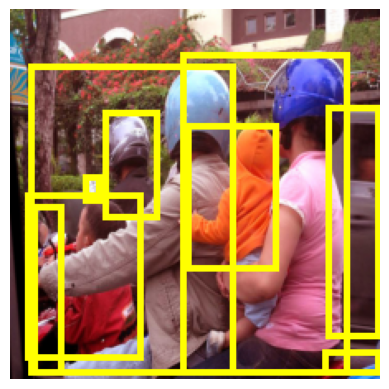

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

img_tensor , target = train_dataset[1000]

img_vis = denormalize_image(img_tensor)

img_tenssor_with_box = draw_bounding_boxes(img_vis , target['boxes'] , width = 4, colors = 'yellow')

plt.imshow(img_tenssor_with_box.permute(1,2,0))
plt.axis('off')
# plot([(img_tensor , target['boxes'])])

In [29]:
target

{'boxes': BoundingBoxes([[189.6160, 206.1780, 224.0000, 221.3447],
                [ 11.3505,  33.0447, 136.9725, 221.7320],
                [103.0645,  26.1753, 205.7545, 221.4847],
                [106.0850,  69.0853, 162.7150, 158.1860],
                [ 56.8365,  61.3153,  90.8495, 127.6613],
                [  9.4185, 111.4727,  80.6085, 212.9260],
                [ 44.2610, 100.6600,  55.1215, 117.8380],
                [ 13.2405, 118.6780,  32.2770, 221.2980],
                [191.4850,  58.0487, 224.0000, 199.5560]], format=BoundingBoxFormat.XYXY, canvas_size=(224, 224), clamping_mode=soft),
 'labels': tensor([ 4,  1,  1,  1,  1,  1, 40,  4,  8])}

In [30]:
import random
from torchvision import tv_tensors
def plot_transformer_img(img_dir , n : int = 5):
    random_img_path = random.sample(list(img_dir) , n)

    for img_path in random_img_path:
        img = Image.open(img_path)
        ann = get_annotations(img_path)
        img_tensor = tv_tensors.Image(img)
        box = change_box(ann['boxes'], img_tensor )
        # print(box)

        #applying transform
        img_tensor_transfromed , box_transformed  = train_transform(img_tensor , box)
        plot([(img_tensor, box) , (img_tensor_transfromed,box_transformed) ])

        # plt.imshow(draw_bounding_boxes(img_tensor_transfromed ,box_transformed).permute(1,2,0))

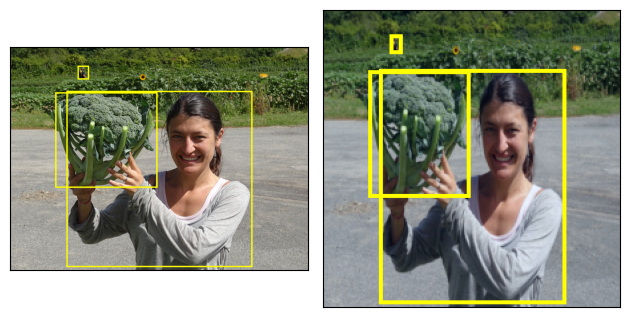

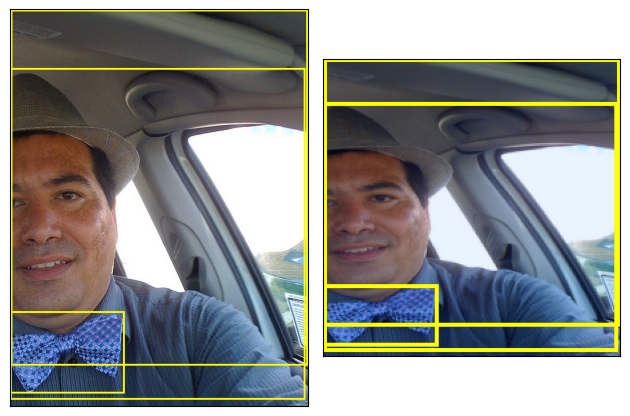

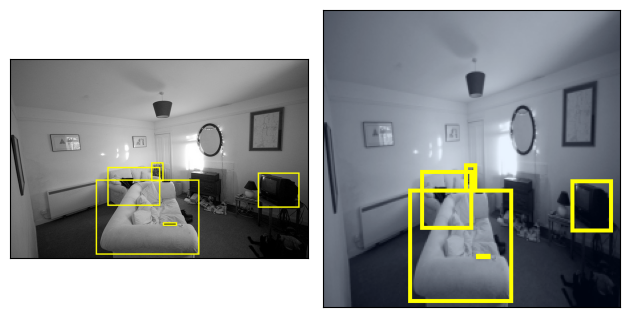

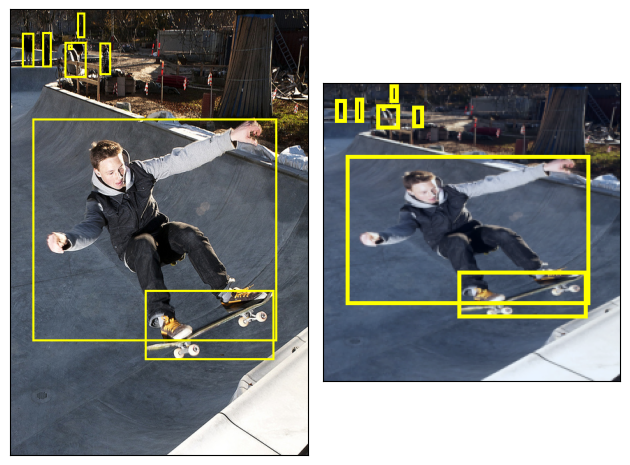

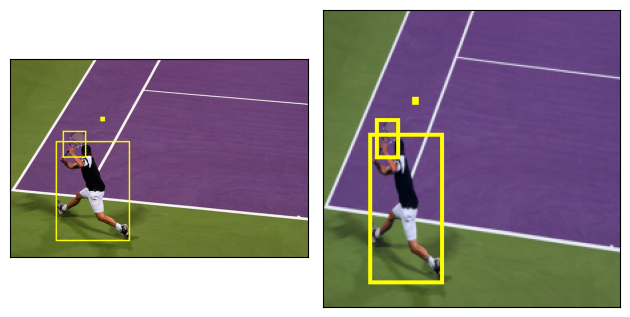

In [31]:
plot_transformer_img(train_dir_path)

In [32]:
train_dataset_small = detectionDatasetCustom(random.sample(train_dir_path , 5000) , train_transform)
test_dataset_small = detectionDatasetCustom(random.sample(train_dir_path , 5000) , train_transform)


In [33]:
from torch.utils.data import DataLoader



# Use collate_fn=lambda x: tuple(zip(*x)) — this is crucial because each image may have a different number of bounding boxes, so PyTorch can’t stack them automatically.
def collate_fn(batch):
    return tuple(zip(*batch))

train_dataloader_small = DataLoader(
    train_dataset_small,
    batch_size=4,
    shuffle=True,
    collate_fn=collate_fn
)

test_dataloader_small = DataLoader(
    test_dataset_small,
    batch_size=4,
    shuffle=False,
    collate_fn=collate_fn
)

In [ ]:
def get_device():
    """
    Returns the best available device:
    - TPU (if torch_xla is installed and TPU is available)
    - GPU (if CUDA is available)
    - CPU (fallback)
    """
    try:
        import torch_xla.core.xla_model as xm
        device = xm.xla_device()
        print(f"✅ Using TPU: {device}")
        return device
    except (ImportError, RuntimeError):
        pass

    import torch
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"✅ Using GPU: {torch.cuda.get_device_name(0)}")
    else:
        device = torch.device("cpu")
        print("⚙️ Using CPU")
    return device


In [34]:
device = get_device()
device


'cuda'

In [35]:
##this won't work if we want to use pretained weights

# from torchvision.models.detection import fasterrcnn_resnet50_fpn

# num_classes = len(coco_data['categories'])  + 1

# model = fasterrcnn_resnet50_fpn(num_classes=num_classes , weights = 'DEFAULT' )
# model.to(device)
# print(model)

In [36]:
import torchvision

torch.manual_seed(42)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

model.to(device)
# print(model)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 143MB/s]  


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [37]:
!pip install torchinfo

In [38]:
# Print with torchinfo
from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
FasterRCNN (FasterRCNN)                                 [1, 3, 224, 224]     [0, 4]               --                   Partial
├─GeneralizedRCNNTransform (transform)                  [1, 3, 224, 224]     [1, 3, 800, 800]     --                   --
├─BackboneWithFPN (backbone)                            [1, 3, 800, 800]     [1, 256, 13, 13]     --                   Partial
│    └─IntermediateLayerGetter (body)                   [1, 3, 800, 800]     [1, 2048, 25, 25]    --                   Partial
│    │    └─Conv2d (conv1)                              [1, 3, 800, 800]     [1, 64, 400, 400]    (9,408)              False
│    │    └─FrozenBatchNorm2d (bn1)                     [1, 64, 400, 400]    [1, 64, 400, 400]    --                   --
│    │    └─ReLU (relu)                                 [1, 64, 400, 400]    [1, 64, 400, 400]    --                   --

In [39]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Replace the head with a new one for your dataset
num_classes = len(coco_data['categories']) + 1  # +1 for background
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [40]:
for param in model.backbone.parameters():
    param.requires_grad = False

##freezing more

for param in model.rpn.parameters():
    param.requires_grad = False

In [41]:
summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
FasterRCNN (FasterRCNN)                                 [1, 3, 224, 224]     [0, 4]               --                   Partial
├─GeneralizedRCNNTransform (transform)                  [1, 3, 224, 224]     [1, 3, 800, 800]     --                   --
├─BackboneWithFPN (backbone)                            [1, 3, 800, 800]     [1, 256, 13, 13]     --                   False
│    └─IntermediateLayerGetter (body)                   [1, 3, 800, 800]     [1, 2048, 25, 25]    --                   False
│    │    └─Conv2d (conv1)                              [1, 3, 800, 800]     [1, 64, 400, 400]    (9,408)              False
│    │    └─FrozenBatchNorm2d (bn1)                     [1, 64, 400, 400]    [1, 64, 400, 400]    --                   --
│    │    └─ReLU (relu)                                 [1, 64, 400, 400]    [1, 64, 400, 400]    --                   --
│  

In [42]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

In [43]:
img_batch , target_batch = next(iter(train_dataloader_small))
print(type(img_batch), type(img_batch[0]))

<class 'tuple'> <class 'torchvision.tv_tensors._image.Image'>


In [44]:
##
# Wrap them in lists
img_batch = [img.to(device) for img in img_batch]
target_batch = [{k: v.to(device) for k, v in t.items()} for t in target_batch]
loss_dict = model(img_batch, target_batch)
loss_dict

{'loss_classifier': tensor(4.6149, device='cuda:0', grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.3860, device='cuda:0', grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.7682, device='cuda:0'),
 'loss_rpn_box_reg': tensor(0.1021, device='cuda:0')}

In [45]:
model.eval()
with torch.no_grad():
    predictions = model(img_batch)
predictions

[{'boxes': tensor([[ 47.6400, 148.2765,  49.3180, 149.6343],
          [ 47.9112, 148.1399,  49.6244, 150.4861],
          [ 46.9898, 148.1283,  48.6732, 150.4564],
          [ 46.5538, 148.2257,  48.2448, 149.5920],
          [ 47.6578, 149.4140,  49.3389, 150.7937],
          [  3.4029,  92.8060,   6.3889,  95.6215],
          [  6.2749,  88.2841,   8.5709,  90.9195],
          [  6.2702,  89.3696,   8.5888,  91.9924],
          [ 46.8316, 147.0096,  48.5684, 149.3665],
          [ 46.5716, 149.3283,  48.2627, 150.7249],
          [ 47.6630, 147.0149,  49.4292, 149.3908],
          [  7.2598,  88.2583,   9.4002,  90.9650],
          [ 46.0938, 148.1234,  47.7561, 150.4440],
          [  7.1326,  89.3281,   9.3159,  92.0298],
          [ 45.4921, 148.2472,  47.1989, 149.6241],
          [ 47.2503, 149.2642,  48.8635, 151.5365],
          [ 48.8485, 148.3572,  50.5414, 149.7249],
          [ 45.9878, 147.0079,  47.6886, 149.3624],
          [ 48.2217, 149.2886,  49.8723, 151.5751],
   

In [46]:

target_batch

[{'boxes': BoundingBoxes([[ 48.9580,  24.0789, 161.9905, 147.9073],
                 [ 61.9080, 124.2504, 147.4690, 173.0770]], device='cuda:0', format=BoundingBoxFormat.XYXY, canvas_size=(224, 224), clamping_mode=soft),
  'labels': tensor([ 1, 38], device='cuda:0')},
 {'boxes': BoundingBoxes([[163.0020,  61.2564, 183.9950, 141.9803],
                 [ 49.3675,  80.4564, 163.4010, 220.6059],
                 [  6.7165,  73.4898,  99.0745, 221.4819],
                 [ 89.3550,  16.9705, 123.9350,  96.5613],
                 [121.5760,  24.6662, 168.2555, 113.2590],
                 [138.0820,  28.8997, 223.6745, 221.3298],
                 [ 76.9335, 127.2026,  86.2995, 136.7659],
                 [ 56.4900,  94.4210,  70.9660, 128.6190],
                 [134.0115, 106.3869, 151.5640, 123.5882],
                 [119.9135,  51.8977, 122.5000,  60.9416],
                 [  0.4060, 137.1961,  22.0115, 224.0000],
                 [122.2480,   0.0000, 176.9880,  67.4518],
              

In [47]:
def train_step(model, optimizer, dataloader, device):
    model.train()
    total_loss = 0

    for images, targets in dataloader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)  # model computes loss internally
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    return total_loss / len(dataloader)


In [48]:
def test_step(model, dataloader, device):
    model.eval()
    outputs = []
    with torch.inference_mode():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            preds = model(images)
            outputs.extend(preds)  # each pred contains 'boxes', 'labels', 'scores'
    return outputs


Validation loss (optional)

In [49]:
def val_step(model, dataloader, device):
    model.eval()
    total_loss = 0
    with torch.inference_mode():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k,v in t.items()} for t in targets]

            loss_dict = model(images, targets)
            total_loss += sum(loss for loss in loss_dict.values()).item()
    return total_loss / len(dataloader)


In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
epochs = 5

start_time = timer()
for epoch in tqdm(range(epochs)):
    train_loss = train_step(model, optimizer, train_dataloader_small, device)
    val_outputs = test_step(model, test_dataloader_small, device)
    print(val_outputs)
    print()
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {train_loss:.4f}")
end_time = timer()

print('total time', end_time - start_time())

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
len(coco_data['categories'])

In [ ]:
dd
##after taining , get prediction on one img:
img_tensor, target = train_dataset[10]  # single image
# If img_tensor is a tv_tensors.Image, convert it to regular torch tensor:
import torchvision.transforms.functional as F

# Convert tv_tensors.Image -> torch.Tensor in [0,1] float
img_tensor = F.to_tensor(img_tensor)  # shape: [3, H, W]


#Faster R-CNN always expects a list of images, even for one image:
model.eval()
with torch.no_grad():
    predictions = model([img_tensor])  # note the list []


In [ ]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = torchvision.models.detection.fasterrcnn_resnet50_fpn()
# For training
images, boxes = torch.rand(4, 3, 600, 1200), torch.rand(4, 11, 4)
boxes[:, :, 2:4] = boxes[:, :, 0:2] + boxes[:, :, 2:4]
labels = torch.randint(1, 91, (4, 11))
images = list(image for image in images)
targets = []
for i in range(len(images)):
    d = {}
    d['boxes'] = boxes[i]
    d['labels'] = labels[i]
    targets.append(d)
output = model(images, targets)
# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)

# optionally, if you want to export the model to ONNX:
predictions